<b> Importing the libraries</b>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
Image_size=256
Batch_size=32
channels=3
Epochs=80

<b>Loading the datasets into the batch size of 32</b>

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
     '/content/drive/MyDrive/Tomato training',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)
class_names=dataset.class_names
class_names

Found 16034 files belonging to 10 classes.


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

<b>Displaying the Dimension of the batch</b>

In [ ]:
print("The number of batches in original",len(dataset))
dataset= dataset.take(100)
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

The number of batches in original 502
(32, 256, 256, 3)
[5 6 7 7 7 7 7 4 5 4 7 1 7 0 5 1 2 7 4 7 7 2 5 7 5 7 0 2 7 5 8 8]


<b>Displaying the first 7 images from the initial batch of the loaded dataset.</b>

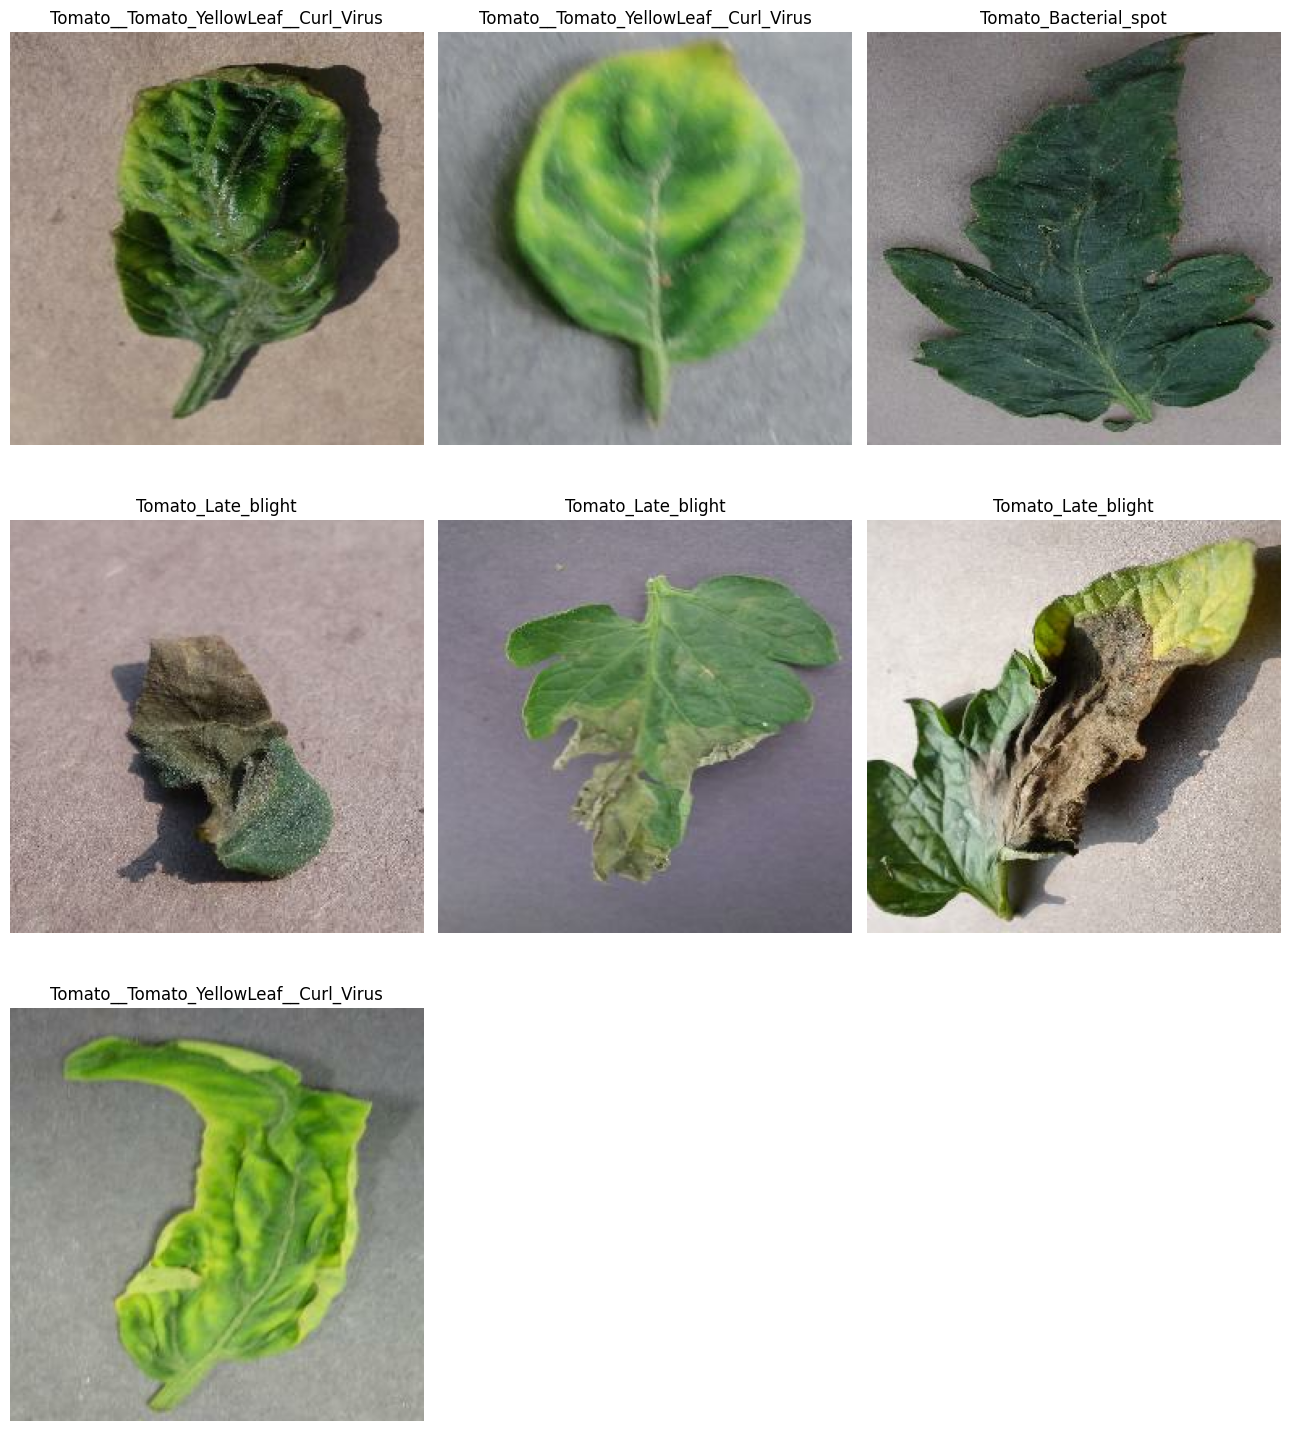

In [ ]:
plt.figure(figsize=(13,15))
for image_batch,label_batch in dataset.take(1):
  for i in range(7):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

<b>Splitting the dataset into Training,Validation and Test Set</b>

In [ ]:
def train_test_valid_split(dataset,train_size=0.8,test_size=0.10,val_size=0.10,shuffle=True,Buffer=1000):
  if shuffle:
    dataset=dataset.shuffle(Buffer)
  train_ds=dataset.take(int(len(dataset)*train_size))
  Temp_ds=dataset.skip(int(len(dataset)*train_size))
  test_ds=Temp_ds.take(int(len(dataset)*test_size))
  val_ds=Temp_ds.skip(int(len(dataset)*test_size))
  return train_ds,test_ds,val_ds

In [ ]:
train_ds,test_ds,val_ds=train_test_valid_split(dataset)
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

80
10
10


<b>Optimizing dataset performance with caching, shuffling, and prefetching</b>

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<b>Defining  Data Preprocessing Layers</b>

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size,Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
   tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

<b>Defining the architecture for the CNN model</b>

In [ ]:
input_shape=(Batch_size,Image_size,Image_size,channels)
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax')
])
model.build(input_shape=input_shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 835,040 (3.19 MB)

 Trainable params: 278,346 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 556,694 (2.12 MB)

<b>Adding Loss Function,Accuracy and optimizer to the models compile method</b>

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9757 - loss: 0.0666 - val_accuracy: 0.8938 - val_loss: 0.4978
Epoch 2/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9447 - loss: 0.1396 - val_accuracy: 0.9500 - val_loss: 0.1676
Epoch 3/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9715 - loss: 0.0896 - val_accuracy: 0.7937 - val_loss: 1.1149
Epoch 4/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9550 - loss: 0.1388 - val_accuracy: 0.9187 - val_loss: 0.2455
Epoch 5/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9708 - loss: 0.0694 - val_accuracy: 0.9656 - val_loss: 0.1266
Epoch 6/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9851 - loss: 0.0494 - val_accuracy: 0.9250 - val_loss: 0.2437
Epoch 7/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.9760 - loss: 0.0721 - val_accuracy: 0.9656 - val_loss: 0.1066
Epoch 8/80
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.9860 - loss: 0.0431 - val_accuracy: 0.9719 - v

<b>Evaluating the models accuracy and loss on the testing datasets</b>

In [ ]:
scores=model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9702 - loss: 0.1589


In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

<b>In this section, we plot the training and validation learning curves to evaluate model performance over time, focusing on both loss and accuracy.</b>


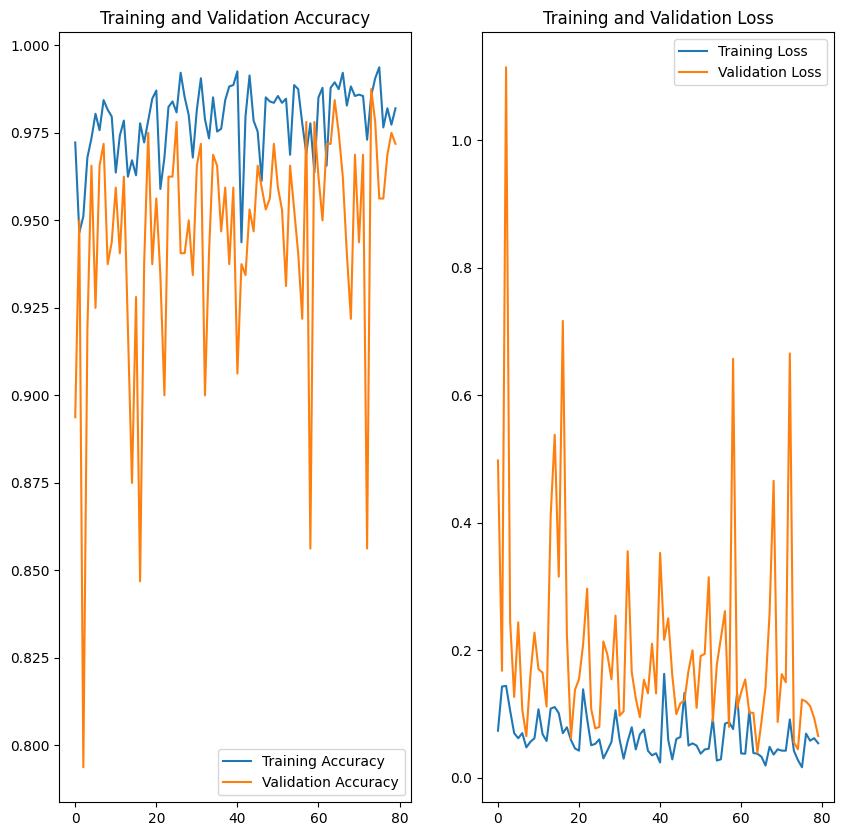

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc,label='Training Accuracy')
plt.plot(range(Epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training Loss')
plt.plot(range(Epochs),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<b>Predictions Using the Trained CNN Model</b>


Image to predict


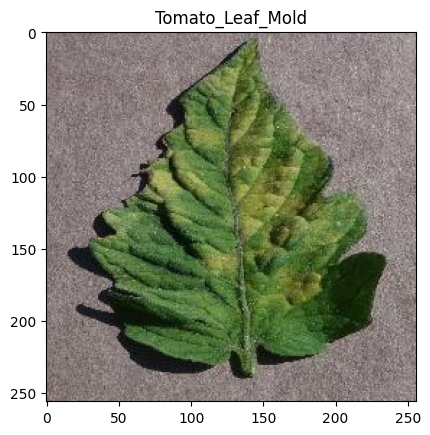

Image Label: Tomato_Leaf_Mold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
Prediction : [2.0799248e-12 1.4546171e-07 8.6266182e-06 9.9989688e-01 9.3930721e-05
 4.2627525e-07 6.8265033e-11 1.0121621e-11 7.0400737e-14 1.6143597e-16]
Predicted Label: Tomato_Leaf_Mold


In [ ]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    print("Image to predict")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.show()
    print("Image Label:",class_names[label_batch[0]])
    batch_pred=model.predict(image_batch)
    print("Prediction :",batch_pred[0])
    print("Predicted Label:",class_names[np.argmax(batch_pred[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


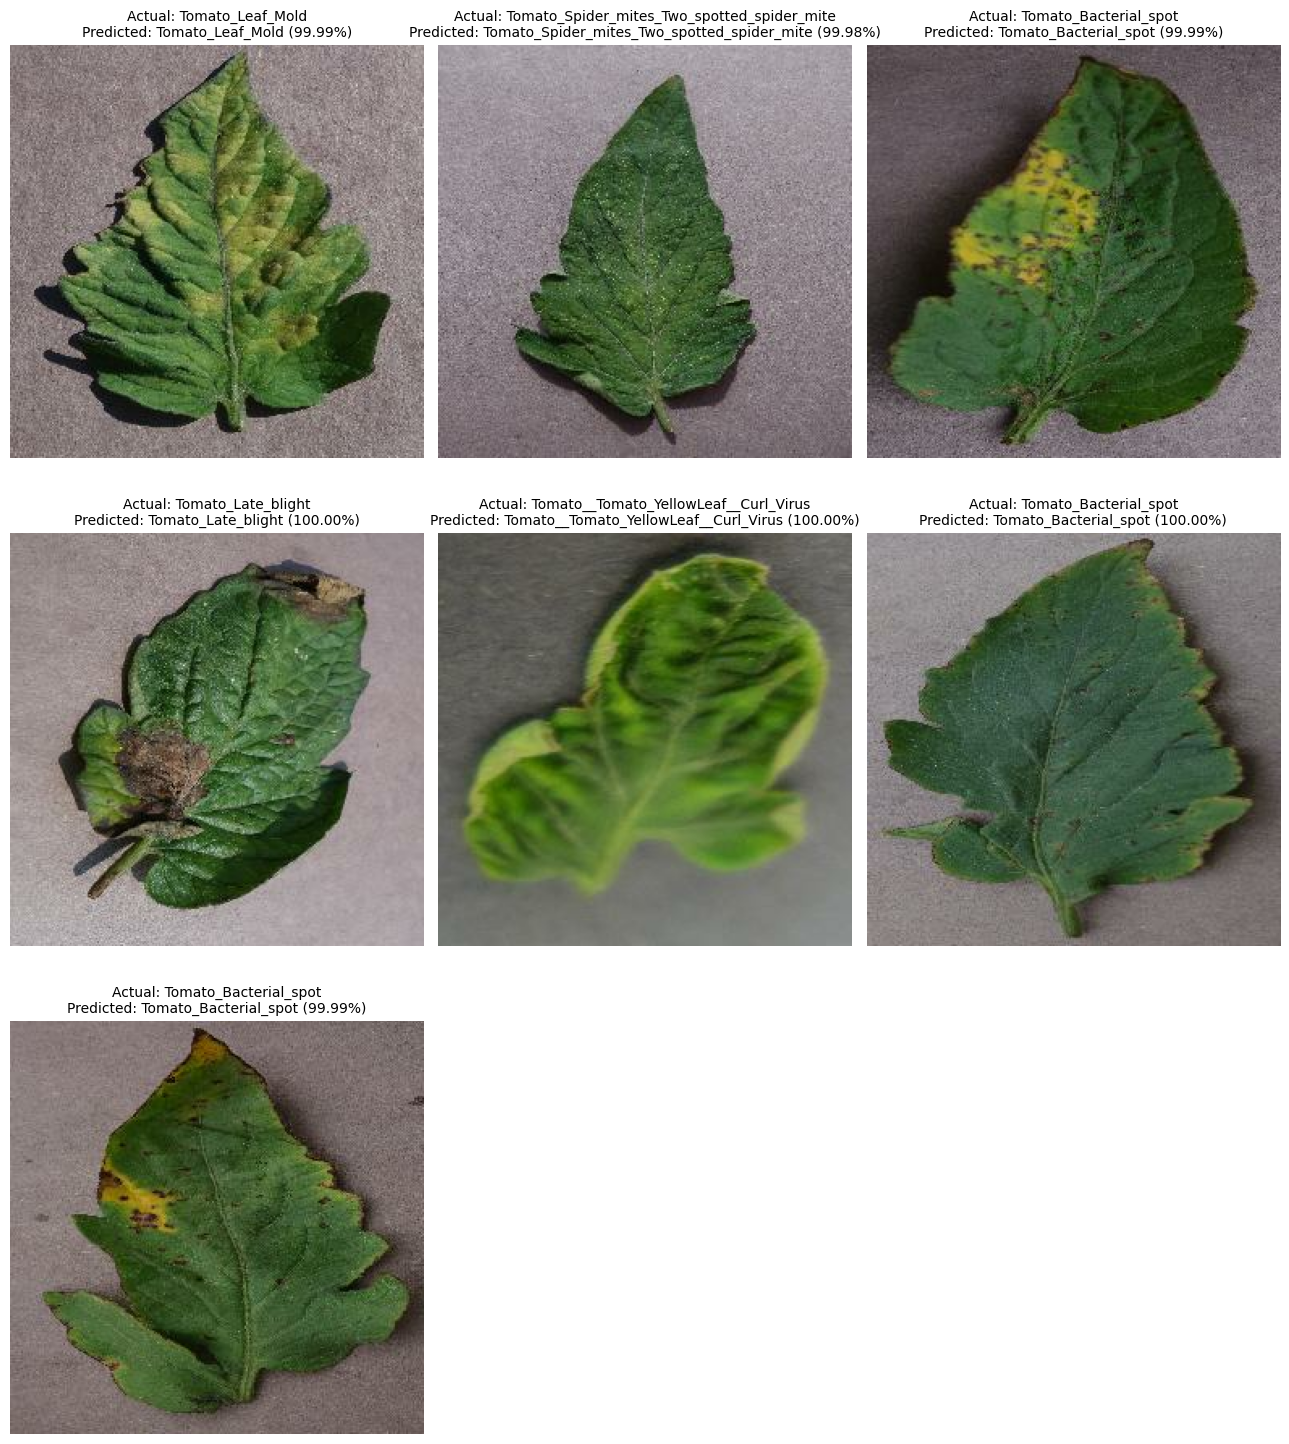

In [ ]:
plt.figure(figsize=(13,15))
for image_batch, label_batch in test_ds.take(1):
    batch_pred = model.predict(image_batch)
    for i in range(7):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

        True_label = class_names[label_batch[i]]
        pred_idx = np.argmax(batch_pred[i])
        Predicted_label = class_names[pred_idx]
        Confidence = batch_pred[i][pred_idx]

        plt.title(
            f"Actual: {True_label}\n"
            f"Predicted: {Predicted_label} ({Confidence:.2%})",
            fontsize=10
        )
plt.tight_layout()
plt.show()


<b>The trained CNN model is saved in the `.keras` format for future loading and inference. This format preserves both the model architecture and weights.<b>


In [ ]:
model.save("Tomato_disease_model.keras")
